In [1]:
#from IPython import display
#display.Image("jupyter banner.png")

In [2]:
import seaborn as sns
import pandas as pd

## About Dataset Excercise

The dataset consists of 90 rows and 6 columns.
The columns in the dataset are:
* 'id': the participant ID (integer).
* 'pulse': the participant's pulse rate (beats per minute, integer).
* 'diet': the participant's diet (0 for no special diet, 1 for a low-fat diet).
* 'time': the time elapsed (in minutes) since the participant began exercising.
* 'kind': the type of exercise being performed (either 0 for running or 1 for walking).
* The 'id' column ranges from 1 to 30, with each participant having 3 rows of data.
* The 'pulse' column ranges from 85 to 150.
* The 'diet' column has two possible values: 0 and 1.
* The 'time' column has three possible values: 1, 15, and 30.
* The 'kind' column has two possible values: 0 and 1.
* This dataset can be used to explore the relationships between exercise, diet, and pulse rate, and to build predictive models to estimate pulse rate based on the other variables.

In [3]:
#df=sns.load_dataset("exercise")
#df.head(5)
df = sns.load_dataset("exercise")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB


In [5]:
df.shape


(90, 6)

## Task

* Is there a difference in pulse rate between participants on a low-fat diet and those on a regular diet?
* Does the pulse rate of participants vary with the type of exercise they are performing (walking or running)?
* How does pulse rate change with time since the participant began exercising?
* Perform EDA Analysis
* Apply Machine Learning Models

In [6]:
df=sns.load_dataset("exercise")
df.head(5)

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB


In [8]:
print("The shape of data is ",df.shape)

The shape of data is  (90, 6)


In [9]:
df.dtypes

Unnamed: 0       int64
id               int64
diet          category
pulse            int64
time          category
kind          category
dtype: object

In [10]:
## We found inconsistency in data. Id is a category and not an integer

df.astype('category','id') 

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [11]:
df.dtypes

Unnamed: 0       int64
id               int64
diet          category
pulse            int64
time          category
kind          category
dtype: object

In [12]:
df['id']=df['id'].astype("category")

In [13]:
df['id'].dtypes

CategoricalDtype(categories=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
                  16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
, ordered=False)

In [14]:
df.dtypes

Unnamed: 0       int64
id            category
diet          category
pulse            int64
time          category
kind          category
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     category
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(4), int64(2)
memory usage: 3.5 KB


In [16]:
df.corr()

,Unnamed: 0,pulse
Unnamed: 0,1.000000,0.688489
pulse,0.688489,1.000000


In [17]:
data=df.drop(['Unnamed: 0'],axis=1)

In [18]:
df.corr()

,Unnamed: 0,pulse
Unnamed: 0,1.000000,0.688489
pulse,0.688489,1.000000


In [19]:
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [20]:
data

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest
...,...,...,...,...,...
85,29,no fat,135,15 min,running
86,29,no fat,130,30 min,running
87,30,no fat,99,1 min,running
88,30,no fat,111,15 min,running


In [21]:
data.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [22]:
data.corr()

,pulse
pulse,1.0


In [23]:
categorical_columns = []

for i in data.columns:
    if data[i].dtypes == 'category':
        categorical_columns.append(i)

In [24]:
categorical_columns

['id', 'diet', 'time', 'kind']

In [25]:
numerical_columns = ['pulse']

In [26]:
numerical_columns

['pulse']

In [27]:
for i in categorical_columns:
    print('*'*50)
    print("Top 10 categories for {} are {}".format(i,data[i].dtypes))
    print(data[i].value_counts().sort_values(ascending=False).head(10))
    print("*"*50)

**************************************************
Top 10 categories for id are category
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
Name: id, dtype: int64
**************************************************
**************************************************
Top 10 categories for diet are category
no fat     45
low fat    45
Name: diet, dtype: int64
**************************************************
**************************************************
Top 10 categories for time are category
1 min     30
15 min    30
30 min    30
Name: time, dtype: int64
**************************************************
**************************************************
Top 10 categories for kind are category
rest       30
walking    30
running    30
Name: kind, dtype: int64
**************************************************


In [28]:
for i in numerical_columns:
    print('*'*50)
    print("Top 10 categories for {} are {}".format(i,data[i].dtypes))
    print(data[i].value_counts().sort_values(ascending=False).head(10))
    print("*"*50)

**************************************************
Top 10 categories for pulse are int64
92     5
100    5
97     5
93     4
96     4
94     4
95     4
90     4
98     4
103    4
Name: pulse, dtype: int64
**************************************************


In [29]:
import matplotlib.pyplot as plt

**************************************************
Top 10 categories for id are
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
Name: id, dtype: int64


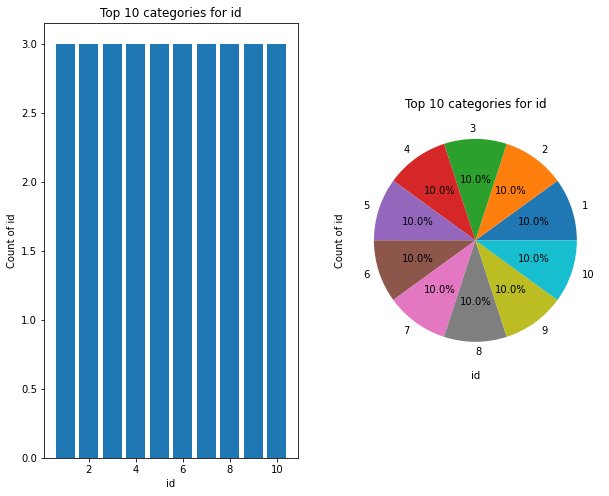

**************************************************
Top 10 categories for diet are
no fat     45
low fat    45
Name: diet, dtype: int64


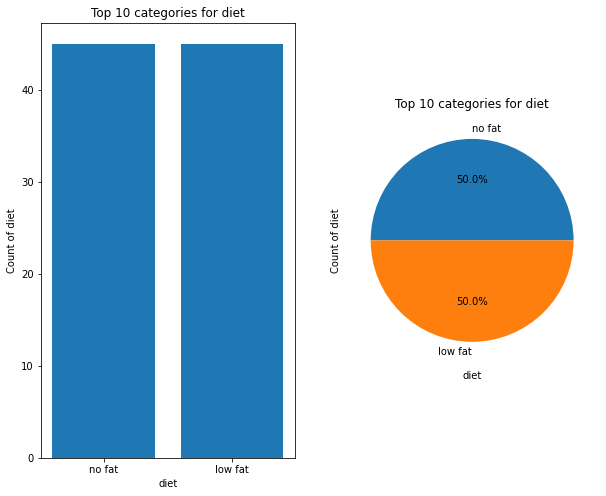

**************************************************
Top 10 categories for time are
1 min     30
15 min    30
30 min    30
Name: time, dtype: int64


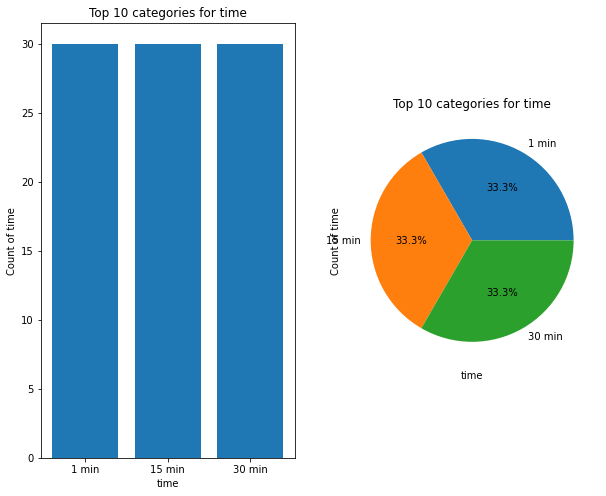

**************************************************
Top 10 categories for kind are
rest       30
walking    30
running    30
Name: kind, dtype: int64


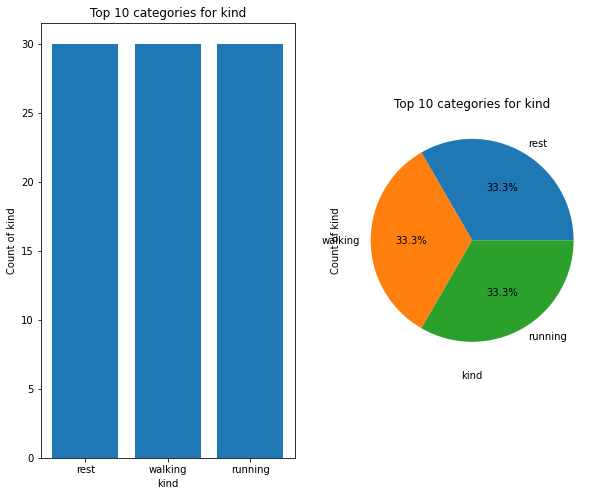

In [30]:
for i in categorical_columns:
    print("*"*50)
    print("Top 10 categories for {} are".format(i))
    print(data[i].value_counts().sort_values(ascending=False).head(10))
    index = data[i].value_counts().sort_values(ascending=False).head(10).index
    values = data[i].value_counts().sort_values(ascending=False).head(10).values
    plt.figure(figsize = [10,8])
    plt.subplot(1,2,1)
    plt.bar(index,values)
    plt.xlabel(i)
    plt.ylabel("Count of {}".format(i))
    plt.title("Top 10 categories for {}".format(i))
    plt.subplot(1,2,2)
    plt.pie(values,labels=index,autopct ="%.1f%%")
    plt.xlabel(i)
    plt.ylabel("Count of {}".format(i))
    plt.title("Top 10 categories for {}".format(i))
    plt.grid()
    plt.show()

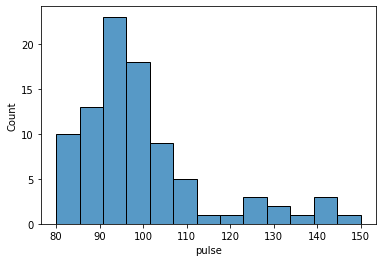

In [31]:
for i in numerical_columns:
    sns.histplot(data=data,x=i)
    plt.show()

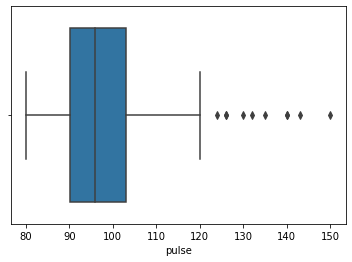

In [32]:
for i in numerical_columns:
    sns.boxplot(data=data,x=i)
    plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
data.skew()

C:\Users\sneha\AppData\Local\Temp\ipykernel_8916\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


pulse    1.550445
dtype: float64

## Modelling

In [35]:
data

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest
...,...,...,...,...,...
85,29,no fat,135,15 min,running
86,29,no fat,130,30 min,running
87,30,no fat,99,1 min,running
88,30,no fat,111,15 min,running


In [36]:
categorical_columns

['id', 'diet', 'time', 'kind']

In [37]:
categorical_cols = ['diet','time','kind']

In [38]:
## Encoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [39]:
for i in categorical_cols:
    data[i]=encoder.fit_transform(data[i])

In [40]:
data

,id,diet,pulse,time,kind
0,1,0,85,0,0
1,1,0,85,1,0
2,1,0,88,2,0
3,2,0,90,0,0
4,2,0,92,1,0
...,...,...,...,...,...
85,29,1,135,1,1
86,29,1,130,2,1
87,30,1,99,0,1
88,30,1,111,1,1


In [41]:
## Define 

X,y = data.drop(['pulse'],axis=1),data['pulse']

In [42]:
X

,id,diet,time,kind
0,1,0,0,0
1,1,0,1,0
2,1,0,2,0
3,2,0,0,0
4,2,0,1,0
...,...,...,...,...
85,29,1,1,1
86,29,1,2,1
87,30,1,0,1
88,30,1,1,1


In [43]:
y

0      85
1      85
2      88
3      90
4      92
     ... 
85    135
86    130
87     99
88    111
89    150
Name: pulse, Length: 90, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [45]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((72, 4), (18, 4), (72,), (18,))

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [47]:
validation_predictions= model.predict(X_test)

In [48]:
validation_predictions

array([ 87.87115688, 113.89564332, 111.44057373,  87.13495504,
        94.99267528,  83.45235065, 110.21303894,  78.78985406,
       107.02176751, 116.15495   ,  93.56937757, 119.34622142,
        93.81306794,  89.34633426,  90.0825361 , 108.24930231,
        89.09869167,  99.45940896])

In [49]:
from sklearn.metrics import r2_score

In [50]:
print("The R2 score of Linear Regression Model is",r2_score(y_test,validation_predictions))

The R2 score of Linear Regression Model is 0.6649279417712219


In [51]:
index = []
for i in range(len(X_test)):
    index.append(i)

In [52]:
index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

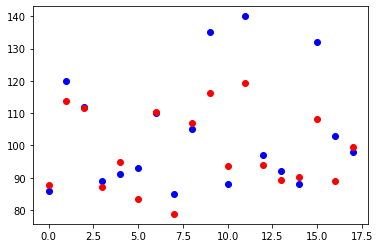

In [53]:
plt.scatter(index,y_test,color = 'blue')
plt.scatter(index,validation_predictions,color='red')
plt.show()

In [54]:
train_data_predictions = model.predict(X_train)

In [55]:
print("The R2 score of Train Data Linear Regression Model is",r2_score(y_train,train_data_predictions))

The R2 score of Train Data Linear Regression Model is 0.5674972364887844


In [67]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

model_lin_reg = LinearRegression()
model_ringe = Ridge()
model_lasso = Lasso()
model_els = ElasticNet()
model_knn = KNeighborsRegressor()

# Start Training

model_lin_reg.fit(X_train,y_train)
model_ringe.fit(X_train,y_train)
model_lasso.fit(X_train,y_train)
model_els.fit(X_train,y_train)
model_knn.fit(X_train,y_train)

KNeighborsRegressor()

In [68]:
# Getting predictions
from sklearn.metrics import r2_score, mean_squared_error as mse
# Progress bar visalizer
from tqdm.notebook import tqdm
val_score_list = []
train_score_list = []
models_list = [model_lin_reg,model_ringe,model_lasso,model_els,model_knn]

for mymodel in tqdm(models_list):
    predictions_training = mymodel.predict(X_train)
    predictions_validaiton = mymodel.predict(X_test)
    rsquared_score_training = r2_score(predictions_training,y_train)
    rsquared_score_validation = r2_score(predictions_validaiton,y_test)
    val_score_list.append(rsquared_score_validation)
    train_score_list.append(rsquared_score_training)

  0%|          | 0/5 [00:00<?, ?it/s]

In [69]:
final_view = pd.DataFrame({"Model List": ["model_lin_reg","model_ringe","model_lasso","model_els","model_knn"],
                           "rsquared_score_training":train_score_list,
                            "rsquared_score_validation":val_score_list
                            })

In [70]:
final_view

,Model List,rsquared_score_training,rsquared_score_validation
0,model_lin_reg,0.237877,0.316256
1,model_ringe,0.227180,0.304206
2,model_lasso,0.017581,0.081983
3,model_els,-0.133670,-0.154658
4,model_knn,0.532513,0.255508


In [71]:
from sklearn.svm import SVR

In [72]:
model_svr = SVR()
model_svr.fit(X_train, y_train)

SVR()

In [73]:
svr_predictions = model_svr.predict(X_test)

In [74]:
from sklearn.metrics import r2_score
r2_score(svr_predictions,y_test)

-30.156261806451084

In [77]:
from sklearn.model_selection import RandomizedSearchCV
param_grid_svr = {"kernel":["linear", "poly", "rbf", "sigmoid"],
                  "gamma":["scale", "auto"]}
random_search_svr = RandomizedSearchCV(estimator= model_svr,
                                       param_distributions= param_grid_svr,
                                       n_jobs= -1,
                                       scoring= "r2")

In [79]:
# Starting the hyperparameter tuning
random_search_svr.fit(X_train, y_train)
random_search_svr.best_estimator_

C:\Users\sneha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVR(gamma='auto', kernel='poly')

In [80]:
best_svr_random =  SVR(gamma='auto', kernel='poly')
best_svr_random.fit(X_train,y_train)
best_svr_random_predictions = best_svr_random.predict(X_test)
best_svr_random_r2_score = r2_score(y_test, best_svr_random_predictions)

In [81]:
best_svr_random_r2_score

0.8092320768387923

In [82]:
best_svr_random_predictions_train = best_svr_random.predict(X_train)
best_svr_random_r2_score_train = r2_score(y_train, best_svr_random_predictions_train)

In [83]:
best_svr_random_r2_score_train

0.8123028600585662

### Best Model for Prediction will be RANDOM SVR Model